In [49]:
#decision tree classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

print(iris.keys())

from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file = 'iris_tree.dot',
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True, filled = True
               )

## typing this in command line 'dot -Tpng iris_tree.dot -o iris_tree.png' and then go in files and open it


#### tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [50]:
#DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)


export_graphviz(tree_reg, out_file = 'iris_treereg.dot',
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True, filled = True
               )

## typing this in command line 'dot -Tpng iris_tree.dot -o iris_tree.png' and then go in files and open it

tree_reg.predict([[5, 1.5]])

generating the data ...


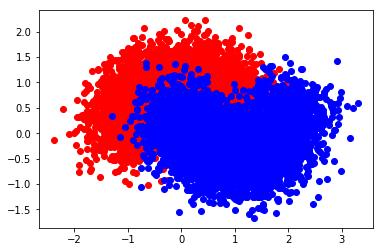

splitting the data ... 
starting grid search ... 
0.838 {'max_leaf_nodes': 20, 'min_samples_leaf': 7, 'min_samples_split': 10}
0.842 {'max_leaf_nodes': 20, 'min_samples_leaf': 7, 'min_samples_split': 100}
0.8415 {'max_leaf_nodes': 20, 'min_samples_leaf': 25, 'min_samples_split': 10}
0.8405 {'max_leaf_nodes': 20, 'min_samples_leaf': 25, 'min_samples_split': 100}
0.8375 {'max_leaf_nodes': 25, 'min_samples_leaf': 7, 'min_samples_split': 10}
0.842 {'max_leaf_nodes': 25, 'min_samples_leaf': 7, 'min_samples_split': 100}
0.8415 {'max_leaf_nodes': 25, 'min_samples_leaf': 25, 'min_samples_split': 10}
0.8405 {'max_leaf_nodes': 25, 'min_samples_leaf': 25, 'min_samples_split': 100}
training accuracy:  0.861625
testing accuracy:  0.8595


In [30]:
#Q7

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, reciprocal, uniform

print('generating the data ...')
X, y = make_moons(n_samples=10000, shuffle=True, noise=0.4, random_state = 42)

import matplotlib.pyplot as plt
plt.plot(X[:,0][y==0], X[:,1][y==0], 'ro')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo')
plt.show()

import numpy as np
from sklearn.model_selection import train_test_split

print('splitting the data ... ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

tree_clf = DecisionTreeClassifier(max_depth = 5)

from sklearn.model_selection import GridSearchCV

params = {
    
    'max_leaf_nodes' : [20, 25],
    'min_samples_leaf': [7, 25],
    'min_samples_split' : [10, 100]
       
}
    
print('starting grid search ... ')
objgs = GridSearchCV(tree_clf, params, cv = 3, scoring = 'accuracy')
grid_res = objgs.fit(X_train[:2000], y_train[:2000])

r_cv = grid_res.cv_results_

for mean_score, params in zip(r_cv["mean_test_score"], r_cv["params"]):
    print((mean_score), params)
    
from sklearn.metrics import accuracy_score
final_model = grid_res.best_estimator_
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
train_sc = accuracy_score(y_train, train_pred)
print('training accuracy: ', train_sc)

test_pred = final_model.predict(X_test)
test_sc = accuracy_score(y_test, test_pred)
print('testing accuracy: ', test_sc)

In [ ]:
#Q8. Growing a forest


from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, reciprocal, uniform

print('generating the data ...')
X, y = make_moons(n_samples=100000, shuffle=True, noise=0.4, random_state = 42)


In [ ]:


from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))



In [ ]:

rs.split(X_train)
